In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/train_set.csv', #nrows=10, 
                 low_memory=False, na_values='?')
print(df.shape)
df.head()

(1224734, 18)


,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
0,2.884034,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177
1,2.775633,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177
2,3.708368,NaN,NaN,NaN,St Petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"PR.MARSHALA ZHUKOVA,31St Petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177
3,2.787498,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177
4,2.892510,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177


In [4]:
df0 = df[(df['work_add_lon']>=0) & (df['home_add_lon']>=0)&((df['atm_address_lon']>=0)|(df['pos_adress_lon']>=0))]

In [5]:
df0.shape

(613476, 18)

In [6]:
df0['address_lon']=df0['atm_address_lon'].fillna(0) + df0['pos_adress_lon'].fillna(0)
df0['address_lat']=df0['atm_address_lat'].fillna(0) + df0['pos_adress_lat'].fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


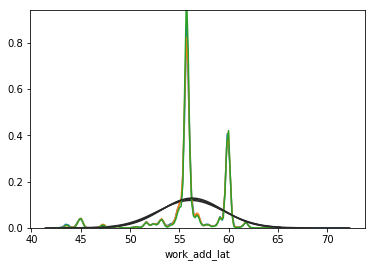

In [8]:
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
sns.distplot(df0['address_lat'], fit=norm, hist=False)
sns.distplot(df0['home_add_lat'], fit=norm, hist=False)
sns.distplot(df0['work_add_lat'], fit=norm, hist=False)

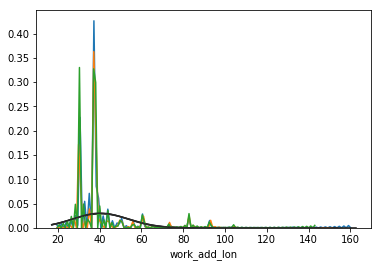

In [9]:
sns.distplot(df0['address_lon'], fit=norm, hist=False)
sns.distplot(df0['home_add_lon'], fit=norm, hist=False)
sns.distplot(df0['work_add_lon'], fit=norm, hist=False)

In [10]:
df0.count()

amount              613476
atm_address         101858
atm_address_lat     103364
atm_address_lon     103364
city                613473
country             613476
currency            613476
customer_id         613476
home_add_lat        613476
home_add_lon        613476
mcc                 613476
pos_address         499071
pos_adress_lat      510112
pos_adress_lon      510112
terminal_id         613476
transaction_date    613476
work_add_lat        613476
work_add_lon        613476
address_lon         613476
address_lat         613476
dtype: int64

In [11]:
from datetime import datetime
df0['weekend'] = [1 if (datetime.strptime(i,"%Y-%m-%d").weekday()>4) else 0 for i in df0['transaction_date']] 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
df0.drop(df0.columns[[1,2,3,4,5,7,11,12,13,14,15]], inplace=True, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
df0.count()

amount          613476
currency        613476
home_add_lat    613476
home_add_lon    613476
mcc             613476
work_add_lat    613476
work_add_lon    613476
address_lon     613476
address_lat     613476
weekend         613476
dtype: int64

In [14]:
df0.head()

,amount,currency,home_add_lat,home_add_lon,mcc,work_add_lat,work_add_lon,address_lon,address_lat,weekend
0,2.884034,643.0,59.851,30.232,5261,59.847,30.177,30.179153,59.844072,1
1,2.775633,643.0,59.851,30.232,5261,59.847,30.177,30.179153,59.844072,0
2,3.708368,643.0,59.851,30.232,5992,59.847,30.177,30.229024,59.858198,0
3,2.787498,643.0,59.851,30.232,5261,59.847,30.177,30.179153,59.844072,1
4,2.892510,643.0,59.851,30.232,5261,59.847,30.177,30.179153,59.844072,0


In [15]:
df0.describe()

,amount,currency,home_add_lat,home_add_lon,mcc,work_add_lat,work_add_lon,address_lon,address_lat,weekend
count,613476.000000,613476.000000,613476.000000,613476.000000,613476.000000,613476.000000,613476.000000,613476.000000,613476.000000,613476.000000
mean,2.812456,643.606200,56.238357,40.547352,5678.653869,56.295634,40.250361,40.588170,56.163394,0.267521
std,0.694016,13.435299,3.219892,13.439009,514.970958,3.100509,13.167567,13.676142,3.356708,0.442667
min,-2.012356,643.000000,43.098000,19.910000,742.000000,43.110000,19.911000,19.887847,42.102032,0.000000
25%,2.338061,643.000000,55.626000,36.026000,5411.000000,55.710000,36.184000,35.880963,55.645459,0.000000
50%,2.729387,643.000000,55.803000,37.577000,5621.000000,55.777000,37.592000,37.587679,55.789497,0.000000
75%,3.214544,643.000000,59.130000,38.083000,5921.000000,59.134000,37.781000,38.059285,59.129000,1.000000
max,6.075307,978.000000,64.568000,150.844000,9402.000000,64.597000,142.742000,159.892567,71.581001,1.000000


In [16]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [17]:
df1 = shuffle(df0, random_state=42)
X = df1.drop(df1.columns[[2,3,5,6]], axis=1)
y = df1[df1.columns[[2,3,5,6]]]

scaler = StandardScaler()
X = scaler.fit(X).transform(X)

In [18]:
X.mean(axis=0)

array([ -2.31598507e-16,  -3.23797784e-15,   8.20833475e-16,
         6.01813283e-17,  -1.36040958e-15,  -1.77671589e-17])

In [19]:
X.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.])

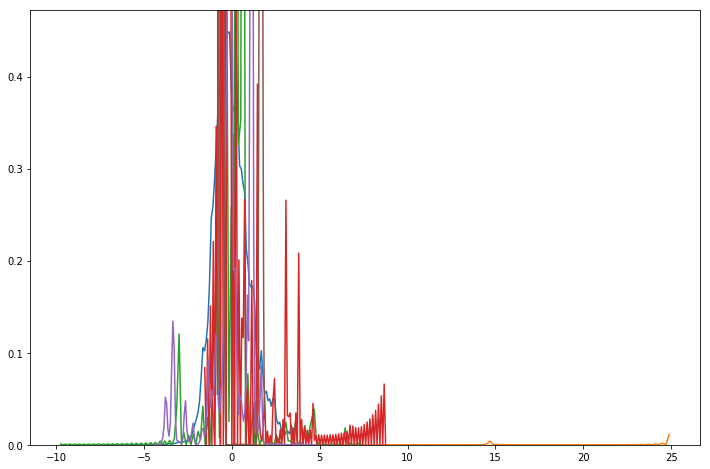

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
for i in range(0, len(X[0])):
    sns.distplot(X[:,i], hist=False)

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

for i in range(len(lr.coef_)) :
    print("\n {}".format(y.columns[i]))
    for coef, col in sorted(zip(lr.coef_[i], df1.drop(df1.columns[[2,3,5,6]], axis=1)), key=lambda x: np.abs(x[0])):
        print("{} \t {}".format(np.round(coef, 4), col))


 home_add_lat
-0.0022 	 currency
0.0044 	 amount
0.0086 	 weekend
-0.0243 	 mcc
-0.0645 	 address_lon
2.7394 	 address_lat

 home_add_lon
-0.0104 	 currency
-0.0187 	 weekend
-0.0413 	 amount
0.0976 	 mcc
-0.2185 	 address_lat
11.4382 	 address_lon

 work_add_lat
-0.0056 	 currency
0.0105 	 amount
0.0122 	 weekend
-0.0183 	 mcc
-0.0573 	 address_lon
2.6265 	 address_lat

 work_add_lon
-0.0073 	 weekend
-0.03 	 currency
-0.1184 	 amount
0.1263 	 mcc
-0.1821 	 address_lat
10.8608 	 address_lon


In [22]:
from sklearn.model_selection import cross_val_score
for i in range(y.columns.size) :
    error = abs(np.mean(cross_val_score(lr, X, y[y.columns[i]], cv=3, scoring='neg_mean_squared_error')))
    print("\t {}".format(np.round(error,3)))

	 2.779
	 48.584
	 2.644
	 54.414


In [46]:
alphas = np.arange(0.001, 1, 0.01)

In [161]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alphas, random_state=42, cv=5)
def PlotAlpha(i) :
    lasso_cv.fit(X, y[y.columns[i]])
    mean_mse = np.mean(lasso_cv.mse_path_, axis = 1)
    plt.subplot(4, 1, i+1)
    plt.plot(lasso_cv.alphas_, mean_mse)
    plt.xlabel('alpha')
    plt.ylabel('MSE')
    plt.title('Lasso '+y.columns[i])
    print('alpha = {}'.format(lasso_cv.alpha_))

alpha = 0.001
alpha = 0.001
alpha = 0.001
alpha = 0.001


(None, None, None, None)

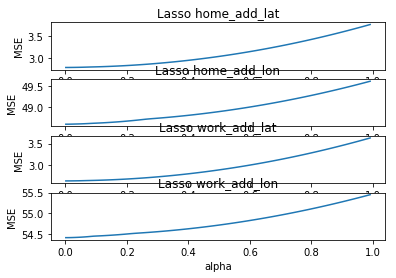

In [162]:
PlotAlpha(0), PlotAlpha(1), PlotAlpha(2), PlotAlpha(3)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42, shuffle=True)

In [105]:
from sklearn.linear_model import Lasso
y_pred = Lasso(lasso_cv.alpha_).fit(X_train, y_train).predict(X_test)

In [103]:
def Plot(i) :
    plt.figure(figsize=(12,8))
    plt.scatter(x=y_test[y_test.columns[i]], y=y_pred.T[i], edgecolors='black', alpha=0.8)
    plt.title(y_test.columns[i])
    plt.xlabel('y_test')
    plt.ylabel('y_pred')

(None, None, None, None)

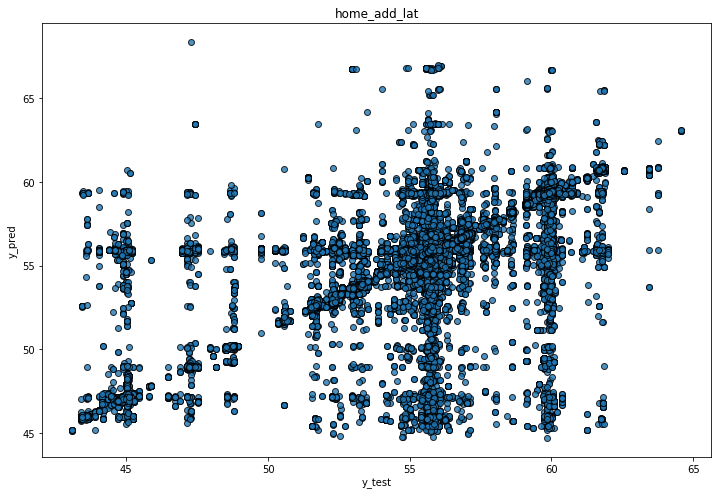

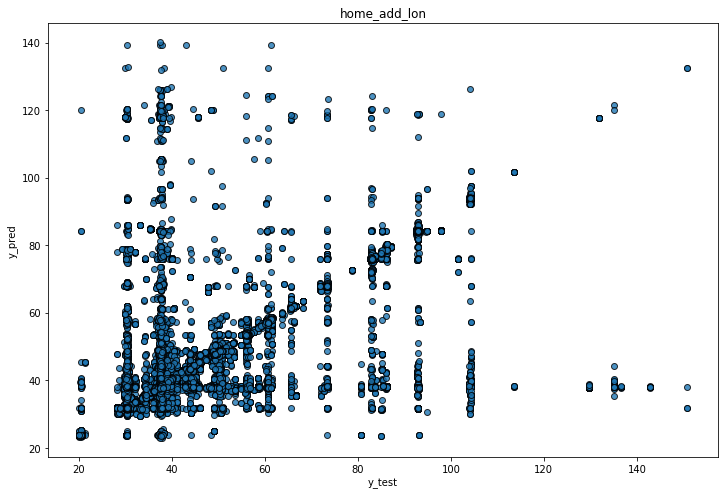

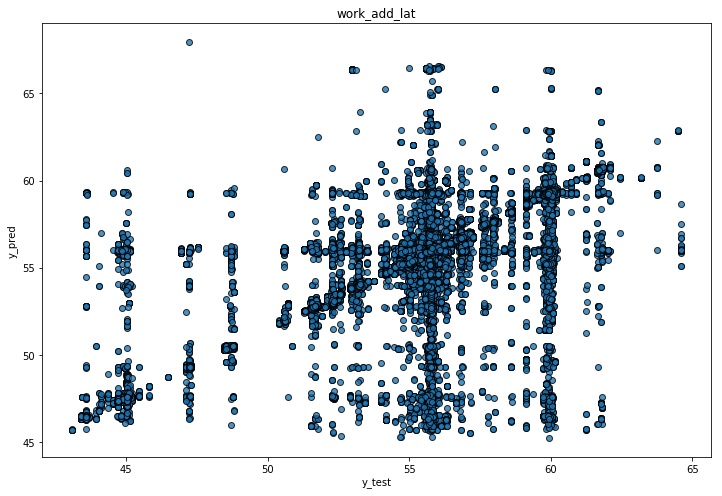

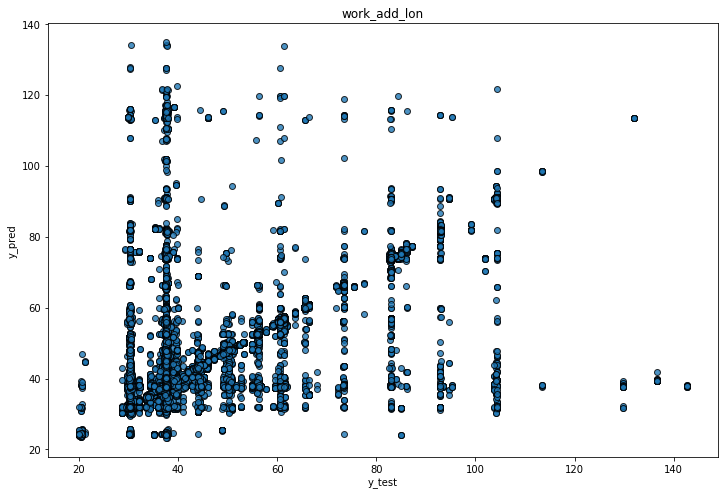

In [106]:
Plot(0), Plot(1), Plot(2), Plot(3)